# 환경설정

## 패키지 설치 및 임포트

In [ ]:
# !pip install scikit-learn==1.3.0 -q
# !pip install torch==2.0.1 -q
# !pip install torchvision==0.15.2 -q

In [1]:
!pip install scikit-learn
!pip install torch
!pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [3]:
import numpy as np # 기본적인 연산을 위한 라이브러리
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리
from tqdm.notebook import tqdm # 상태 바를 나타내기 위한 라이브러리

import torch # PyTorch 라이브러리
import torch.nn as nn # 모델 구성을 위한 라이브러리
import torch.optim as optim # optimizer 설정을 위한 라이브러리
from torch.utils.data import Dataset, DataLoader # 데이터셋 설정을 위한 라이브러리

import torchvision # PyTorch의 컴퓨터 비전 라이브러리
import torchvision.transforms as T # 이미지 변환을 위한 모듈

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score # 성능지표 측정

In [4]:
# seed 고정
import random
import torch.backends.cudnn as cudnn

def random_seed(seed_num):
    torch.manual_seed(seed_num)
    torch.cuda.manual_seed(seed_num)
    torch.cuda.manual_seed_all(seed_num)
    np.random.seed(seed_num)
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed_num)

random_seed(42)

##  Dataset </b>

* 데이터 셋: MNIST 데이터베이스(Modified National Institute of Standards and Technology database)
* 데이터 셋 개요: MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋입니다. 총 6만 개의 학습 데이터와 1만 개의 숫자 데이터로 이루어져 있으며 [이미지]와 [숫자에 대한 라벨]로 구성됩니다.
* 데이터 셋 저작권: CC BY-SA 3.0
* [MNIST - 위키피디아](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)


In [5]:
# 데이터를 불러올 때, 필요한 변환(transform)을 정의합니다.
mnist_transform = T.Compose([
    T.ToTensor(), # 텐서 형식으로 변환
])

In [6]:
# torchvision 라이브러리를 사용하여 MNIST 데이터 셋을 불러옵니다.
download_root = './MNIST_DATASET'

train_dataset = torchvision.datasets.MNIST(download_root, transform=mnist_transform, train=True, download=True) # train dataset 다운로드
test_dataset = torchvision.datasets.MNIST(download_root, transform=mnist_transform, train=False, download=True) # test dataset 다운로드

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18012467.60it/s]


Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 485373.74it/s]


Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3829011.36it/s]


Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2430844.55it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



In [7]:
# 데이터 셋을 학습 데이터 셋과 검증 데이터 셋으로 분리합니다.
total_size = len(train_dataset)
train_num, valid_num = int(total_size * 0.8), int(total_size * 0.2) # 8 : 2 = train : valid
print("Train dataset 개수 : ",train_num)
print("Validation dataset 개수 : ",valid_num)
train_dataset,valid_dataset = torch.utils.data.random_split(train_dataset, [train_num, valid_num]) # train - valid set 나누기

Train dataset 개수 :  48000
Validation dataset 개수 :  12000


In [8]:
# 앞서 선언한 Dataset을 인자로 주어 DataLoader를 선언합니다.
batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
valid_dataloader = DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

## 최종모델 코드

In [ ]:
# 최종 모델 코드
class DNN(nn.Module):
  def __init__(self, hidden_dims, num_classes, dropout_ratio, apply_batchnorm, apply_dropout, apply_activation, set_super):
    if set_super:
      super().__init__()
...

    self.classifier = nn.Linear(self.hidden_dims[-1], num_classes)
    self.softmax = nn.LogSoftmax(dim = 1)

In [9]:
# 최종 모델 코드
class DNN(nn.Module):
  def __init__(self, hidden_dims, num_classes, dropout_ratio, apply_batchnorm, apply_dropout, apply_activation, set_super):
    if set_super:
      super().__init__()

    self.hidden_dims = hidden_dims
    self.layers = nn.ModuleList()

    for i in range(len(self.hidden_dims) - 1):
      self.layers.append(nn.Linear(self.hidden_dims[i], self.hidden_dims[i+1]))

      if apply_batchnorm:
        self.layers.append(nn.BatchNorm1d(self.hidden_dims[i+1]))

      if apply_activation:
        self.layers.append(nn.ReLU())

      if apply_dropout:
        self.layers.append(nn.Dropout(dropout_ratio))

    self.classifier = nn.Linear(self.hidden_dims[-1], num_classes)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x):
    """
    Input and Output Summary

    Input:
      x: [batch_size, 1, 28, 28]
    Output:
      output: [batch_size, num_classes]

    """
    x = x.view(x.shape[0], -1)  # [batch_size, 784]

    for layer in self.layers:
      x = layer(x)

    x = self.classifier(x) # [batch_size, 10]
    output = self.softmax(x) # [batch_size, 10]
    return output

  def weight_initialization(self, weight_init_method):
    for m in self.modules():
      if isinstance(m, nn.Linear):
        if weight_init_method == 'gaussian':
          nn.init.normal_(m.weight)
        elif weight_init_method == 'xavier':
          nn.init.xavier_normal_(m.weight)
        elif weight_init_method == 'kaiming':
          nn.init.kaiming_normal_(m.weight)
        elif weight_init_method == 'zeros':
          nn.init.zeros_(m.weight)

        nn.init.zeros_(m.bias)

  def count_parameters(self):
    return sum(p.numel() for p in self.parameters() if p.requires_grad)

# 1.학습(training)

## 1-1 손실 함수와 최적화 알고리즘

> `torch.nn`, `torch.optim`를 사용하여 편리하게 손실 함수와 최적화 알고리즘을 구현

### `torch.nn`을 이용하여 손실 함수 구현
`torch.nn` 모듈은 다양한 손실 함수들을 제공합니다. 원하는 손실 함수가 없을 경우, 손실을 계산하는 코드를 직접 구현하여 스칼라 tensor를 반환하는 손실 함수를 직접 구현할 수도 있습니다. 0 ~ 9까지의 클래스를 갖는 MNIST 숫자 이미지 데이터를 분류하기 위해 `NLLLoss`를 불러와 실습해보도록 하겠습니다.

- `torch.nn.NLLLoss`
- `torch.nn.MSELoss`
- `torch.nn.L1Loss`
- `torch.nn.BCELoss`
- `torch.nn.CrossEntropyLoss`
- ..

* [Loss Functions - PyTorch 공식 문서](https://pytorch.org/docs/stable/nn.html#loss-functions): 소개한 손실 함수 이 외에도 다양한 손실 함수가 존재합니다. 홈페이지에서 불러올 수 있는 손실 함수를 확인할 수 있습니다.

In [10]:
criterion = nn.NLLLoss()

# criterion: 손실 함수를 저장하는 변수. 모델의 출력과 실제 레이블 간의 손실(loss)을 계산하는 데 사용됩니다.
# nn.NLLLoss(): PyTorch의 nn 모듈에서 제공하는 Negative Log-Likelihood Loss 손실 함수
# 손실 계산: criterion(output, target)은 예측된 로그 확률과 실제 레이블을 비교하여 손실 값을 계산합니다.

> 10개의 레이블 중에서 1개를 맞추도록 classification 하는 문제이기 때문에 `CrossEntropyLoss` 를 사용해야 하지만, 최종 코델 코드 에서 `LogSoftmax` 를 썼기 때문에 `NLLLoss` 를 사용

> `NLLLoss` 와 `LogSoftmax` 가 합쳐진 것이 `CrossEntropyLoss`



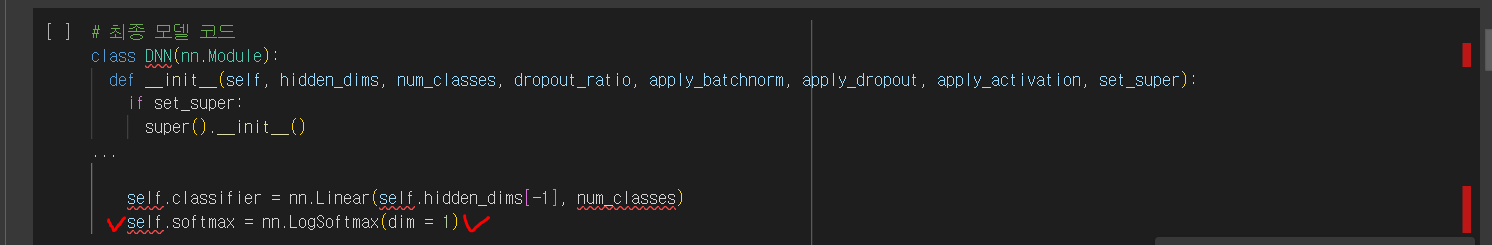

* Loss 를 정의 했으면,
* 개선된 Loss를 가지고,
* propagation 을 진행하고
* 그것에 맞춰서 모델의 파라미터 업데이트 및 최적화
* 최적화 알고리즘 구현 (Pytorch)에서 구현된 것을 잘 가져다 쓰기

### `torch.optim`에 구현된 최적화 알고리즘 사용
`torch.optim` 모듈은 다양한 최적화 알고리즘을 제공합니다. 실습에서는 Adam 알고리즘을 사용해 실습해보도록 하겠습니다.

- `torch.optim.SGD`
- `torch.optim.Adam`
- `torch.optim.Adagrad`
- `torch.optim.RMSprop`
- ..

`torch.optim`을 통해 최적화 알고리즘을 구현할 경우, ***선언한 모델의 가중치를 필수적으로 선언***해야

이 외에도 PyTorch의 optimizer에는 주요 인자들이 존재

- `lr`: 학습률(learning rate) 하이퍼 파라미터
- `weight_decay`: L2 regularization에 사용되는 하이퍼 파라미터

* [torch.optim - PyTorch 공식 문서](https://pytorch.org/docs/stable/optim.html): 소개한 최적화 알고리즘 이 외에도 다양한 최적화 알고리즘이 존재합니다.
* [torch.optim.Adam - PyTorch 공식 문서](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam): Adam documentation

아래 코드는
* 학습률과 모델의 하이퍼파라미터를 설정하고,
* DNN 모델을 정의한 후
* Adam 최적화 알고리즘을 설정

모델 학습 과정에서 가중치를 효과적으로 업데이트하여 최적의 성능을 달성할 수 있음

In [11]:
# 학습률 설정
lr = 0.001

# 모델 하이퍼파라미터 설정
hidden_dim = 128
hidden_dims = [784, hidden_dim * 4, hidden_dim * 2, hidden_dim]

# 모델 정의
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)

# 최적화 알고리즘 설정
optimizer = optim.Adam(model.parameters(), lr = lr)

'''
-----------------------------------------------------------------------------
lr: 학습률(learning rate) : 모델이 가중치를 업데이트할 때 사용하는 스텝 크기
-----------------------------------------------------------------------------
hidden_dim = 128 <= 은닉층의 기본차원 설정
hidden_dims: 은닉층의 크기를 설정하는 리스트
    # 784: 입력 크기 (28x28 이미지 크기)
    # hidden_dim * 4 = 512: 첫 번째 은닉층의 크기
    # hidden_dim * 2 = 256: 두 번째 은닉층의 크기
    # hidden_dim = 128: 세 번째 은닉층의 크기
-----------------------------------------------------------------------------
DNN 클래스의 인스턴스를 생성
    # hidden_dims=hidden_dims: 앞서 정의한 은닉층 크기 리스트를 전달
    # num_classes=10: 출력 클래스 수를 10으로 설정. MNIST 데이터셋의 10개 숫자 클래스(0-9)를 나타냄
    # dropout_ratio=0.2: 드롭아웃 비율을 0.2로 설정
    # apply_batchnorm=True: 배치 정규화를 적용하도록 설정
    # apply_dropout=True: 드롭아웃을 적용하도록 설정
    # apply_activation=True: 활성화 함수를 적용하도록 설정
    # set_super=True: super().__init__()를 호출하여 부모 클래스의 초기화 메서드를 호출
-----------------------------------------------------------------------------
optimizer: 모델의 가중치를 업데이트하기 위한 최적화 알고리즘을 설정
    # optim.Adam: Adam 최적화 알고리즘을 사용.
    # Adam은 학습률을 자동으로 조정하고 모멘텀을 사용하여 가중치를 업데이트하는 알고리즘으로, 일반적으로 성능이 우수함
    # model.parameters(): 모델의 가중치와 편향 등 학습 가능한 파라미터를 전달
    # lr=lr: 앞서 설정한 학습률(0.001)을 전달합
-----------------------------------------------------------------------------
'''

## 1-2 학습과정

> PyTorch를 사용하여 딥러닝 모델을 학습. 학습을 진행하며, 검증 데이터 셋에 대해 loss가 감소하지 않고 `patience`만큼 계속 증가한다면 학습을 중단.

### 최적의 모델 저장

아래 코드는
* 모델의 학습 및 평가를 체계적으로 수행하고,
* 최적의 모델을 저장하며
* 조기 종료를 통해 과적합을 방지하는 역할을 합니다.

각 함수는 특정 작업을 수행하여 모델 학습 과정에서 필요한 다양한 단계들을 관리합니다.

In [12]:
# 학습 함수 (training) : 모델을 학습 모드로 설정하고, 주어진 에포크(epoch) 동안 학습 데이터를 사용하여 모델을 학습
'''
입력 매개변수:
    # model: 학습할 모델
    # dataloader: 학습 데이터를 배치 단위로 로드하는 데이터 로더
    # train_dataset: 전체 학습 데이터셋
    # criterion: 손실 함수
    # optimizer: 최적화 알고리즘
    # device: 모델 및 데이터를 실행할 디바이스 (CPU 또는 GPU)
    # epoch: 현재 에포크 번호
    # num_epochs: 전체 에포크 수
'''
def training(model, dataloader, train_dataset, criterion, optimizer, device, epoch, num_epochs):
  model.train()  # 모델을 학습 모드로 설정
  train_loss = 0.0
  train_accuracy = 0

  tbar = tqdm(dataloader)  # 데이터 로더에 tqdm 진행 표시줄을 추가
  for images, labels in tbar:
      images = images.to(device)  # 이미지를 디바이스로 이동
      labels = labels.to(device)  # 레이블을 디바이스로 이동

      # Forward propagation (순전파)
      outputs = model(images)
      loss = criterion(outputs, labels)

      # Back propagation (역전파) 및 weights (파라미터)업데이트
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # 손실과 정확도 계산 후 더해줌
      train_loss += loss.item()
      # torch.max에서 dim 인자에 값을 추가할 경우, 해당 dimension에서 최댓값과 최댓값에 해당하는 인덱스를 반환
      _, predicted = torch.max(outputs, 1)
      train_accuracy += (predicted == labels).sum().item()

      # tqdm의 진행바에 표시될 설명 텍스트를 설정
      tbar.set_description(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}")

  # 에폭별 학습 손실 및 정확도 반환
  train_loss = train_loss / len(dataloader)
  train_accuracy = train_accuracy / len(train_dataset)

  return model, train_loss, train_accuracy



# 검증 함수 (evaluation) : 모델을 평가 모드로 설정하고, 검증 데이터를 사용하여 모델의 성능을 평가
'''
입력 매개변수:
    # model: 평가할 모델
    # dataloader: 검증 데이터를 배치 단위로 로드하는 데이터 로더
    # valid_dataset: 전체 검증 데이터셋
    # criterion: 손실 함수
    # device: 모델 및 데이터를 실행할 디바이스 (CPU 또는 GPU)
    # epoch: 현재 에포크 번호
    # num_epochs: 전체 에포크 수
'''
def evaluation(model, dataloader, valid_dataset, criterion, device, epoch, num_epochs):
  model.eval()  # 모델을 평가 모드로 설정
  valid_loss = 0.0
  valid_accuracy = 0

  with torch.no_grad(): # model의 업데이트 막기 위해 역전파를 비활성화 (학습 모드와는 다르게 gradient 계산이 필요 없음)
      tbar = tqdm(dataloader)
      for images, labels in tbar:
          images = images.to(device)
          labels = labels.to(device)

          # 순전파
          outputs = model(images)
          loss = criterion(outputs, labels)

          # 손실과 정확도 계산
          valid_loss += loss.item()
          # torch.max에서 dim 인자에 값을 추가할 경우, 해당 dimension에서 최댓값과 최댓값에 해당하는 인덱스를 반환
          _, predicted = torch.max(outputs, 1)
          valid_accuracy += (predicted == labels).sum().item()

          # tqdm의 진행바에 표시될 설명 텍스트를 설정 : 손실과 정확도를 계산하고, tqdm 진행 표시줄에 현재 손실을 표시
          tbar.set_description(f"Epoch [{epoch+1}/{num_epochs}], Valid Loss: {loss.item():.4f}")

  valid_loss = valid_loss / len(dataloader)
  valid_accuracy = valid_accuracy / len(valid_dataset)

  return model, valid_loss, valid_accuracy  # 에포크별 검증 손실 및 정확도를 반환




# 위의 학습/검증은 1개의 epoch 에 대해서 모델 학습
# 아래 학습 루프는 여러개의 epoch에 대해서 학습

# 학습 루프 함수 (training_loop) : 모델을 학습하고, 주어진 에포크 동안 검증 성능을 모니터링하여 최적의 모델을 저장하고 조기 종료(Early Stopping)를 수행
'''
입력 매개변수:
    # model: 학습할 모델
    # train_dataloader: 학습 데이터를 배치 단위로 로드하는 데이터 로더
    # valid_dataloader: 검증 데이터를 배치 단위로 로드하는 데이터 로더
    # criterion: 손실 함수
    # optimizer: 최적화 알고리즘
    # device: 모델 및 데이터를 실행할 디바이스 (CPU 또는 GPU)
    # num_epochs: 전체 에포크 수
    # patience: 조기 종료를 위한 인내(epoch) 수
    # model_name: 저장할 모델 파일 이름
'''
def training_loop(model, train_dataloader, valid_dataloader, criterion, optimizer, device, num_epochs, patience, model_name):
    best_valid_loss = float('inf')  # 가장 좋은 validation loss (검증 손실 값)을 무한대로 초기화
    early_stop_counter = 0  # 조기 종료 카운터를 초기화
    valid_max_accuracy = -1

    # 에포크 반복을 통해 학습 및 검증 수행 : 학습 및 검증 손실과 정확도를 계산
    for epoch in range(num_epochs):
        model, train_loss, train_accuracy = training(model, train_dataloader, train_dataset, criterion, optimizer, device, epoch, num_epochs)
        model, valid_loss, valid_accuracy = evaluation(model, valid_dataloader, valid_dataset, criterion, device, epoch, num_epochs)

        if valid_accuracy > valid_max_accuracy:
          valid_max_accuracy = valid_accuracy

        # validation loss가 감소하면(검증 정확도가 향상될 경우) 최적의 모델 저장 및 조기 종료 카운터 리셋
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), f"./model_{model_name}.pt")
            early_stop_counter = 0

        # validation loss가 증가하거나 같으면(검증 손실이 향상되지 않을 경우) 조기 종료 카운터 증가
        else:
            early_stop_counter += 1

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f} Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}")

        # 조기 종료 카운터가 설정한 patience를 초과하면 학습 종료
        if early_stop_counter >= patience:
            print("Early stopping")
            break

    return model, valid_max_accuracy

### 모델 학습

아래 코드는
* 학습 및 검증을 위한 하이퍼파라미터와 모델을 설정하고,
* 모델을 초기화한 후 학습을 수행
* 학습 과정에서 조기 종료를 적용하여 최적의 모델을 저장하고,
* 최종 검증 정확도를 기록

이 과정을 통해 모델의 성능을 모니터링하고 최적의 하이퍼파라미터를 찾을 수 있습니다.

In [14]:
# 하이퍼파라미터 설정
'''
# num_epochs = 100: 모델을 학습할 총 에포크 수를 100으로 설정
# patience = 3: 조기 종료(Early Stopping) 기준으로 설정된 patience epoch 수를 3으로 설정. 검증 손실이 개선되지 않는 최대 연속 에포크 수
# scores = dict(): 모델 성능을 저장할 빈 딕셔너리를 초기화
# device = 'cuda:0': 모델과 데이터를 GPU에서 실행하도록 설정
# model_name = 'exp1': 모델 실험 이름을 설정
# init_method = 'kaiming': 가중치 초기화 방법을 'kaiming'으로 설정
'''
num_epochs = 100
patience = 3  # 보통 2~3으로 설정
scores = dict()
device = torch.device('cpu')
# device = 'cuda:0' # gpu 설정
model_name = 'exp1'
init_method = 'kaiming' # gaussian, xavier, kaiming, zeros


# 모델 초기화 및 설정
'''
model = DNN(...): DNN 클래스의 인스턴스를 생성
    # hidden_dims = hidden_dims: 앞서 정의한 은닉층 크기 리스트를 전달
    # num_classes = 10: 출력 클래스 수를 10으로 설정. MNIST 데이터셋의 10개 숫자 클래스(0-9)를 나타냄
    # dropout_ratio = 0.2: 드롭아웃 비율을 0.2로 설정
    # apply_batchnorm = True: 배치 정규화를 적용하도록 설정
    # apply_dropout = True: 드롭아웃을 적용하도록 설정
    # apply_activation = True: 활성화 함수를 적용하도록 설정
    # set_super = True: super().__init__()를 호출하여 부모 클래스의 초기화 메서드를 호출
model.weight_initialization(init_method): init_method에 따라 모델의 가중치를 초기화
model = model.to(device): 모델을 설정한 장치(GPU)로 이동
'''
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)
model.weight_initialization(init_method)
model = model.to(device)


# 손실 함수 및 최적화 알고리즘 설정
'''
criterion = nn.NLLLoss(): .NLLLoss 손실 함수 정의
optimizer = optim.Adam(model.parameters(), lr = lr): Adam 최적화 알고리즘 설정
    # model.parameters(): 모델의 학습 가능한 파라미터를 전달
    # lr = lr: 앞서 설정한 학습률을 전달
'''
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)


# 모델 학습 및 평가
'''
training_loop(...): 모델을 학습하고 검증하는 함수
    # model: 학습할 모델
    # train_dataloader: 학습 데이터를 배치 단위로 로드하는 데이터 로더
    # valid_dataloader: 검증 데이터를 배치 단위로 로드하는 데이터 로더
    # criterion: 손실 함수
    # optimizer: 최적화 알고리즘
    # device: 모델 및 데이터를 실행할 디바이스 (GPU)
    # num_epochs: 전체 에포크 수
    # patience: 조기 종료를 위한 인내(epoch) 수
    # model_name: 모델 실험 이름
model, valid_max_accuracy: 학습이 완료된 모델과 검증 데이터에서의 최고 정확도를 반환
'''
model, valid_max_accuracy = training_loop(model, train_dataloader, valid_dataloader, criterion, optimizer, device, num_epochs, patience, model_name)


# 모델 성능 저장
'''
scores[model_name] = valid_max_accuracy: 모델 이름을 키로 하여 검증 데이터에서의 최고 정확도를 딕셔너리에 저장
'''
scores[model_name] = valid_max_accuracy

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 0.3167, Train Accuracy: 0.9057 Valid Loss: 0.1229, Valid Accuracy: 0.9621


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [2/100], Train Loss: 0.1677, Train Accuracy: 0.9485 Valid Loss: 0.0985, Valid Accuracy: 0.9688


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [3/100], Train Loss: 0.1293, Train Accuracy: 0.9604 Valid Loss: 0.0879, Valid Accuracy: 0.9738


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [4/100], Train Loss: 0.1121, Train Accuracy: 0.9657 Valid Loss: 0.0785, Valid Accuracy: 0.9756


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [5/100], Train Loss: 0.0963, Train Accuracy: 0.9688 Valid Loss: 0.0749, Valid Accuracy: 0.9770


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [6/100], Train Loss: 0.0824, Train Accuracy: 0.9735 Valid Loss: 0.0719, Valid Accuracy: 0.9789


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [7/100], Train Loss: 0.0743, Train Accuracy: 0.9763 Valid Loss: 0.0633, Valid Accuracy: 0.9808


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [8/100], Train Loss: 0.0657, Train Accuracy: 0.9785 Valid Loss: 0.0674, Valid Accuracy: 0.9818


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [9/100], Train Loss: 0.0628, Train Accuracy: 0.9797 Valid Loss: 0.0706, Valid Accuracy: 0.9798


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [10/100], Train Loss: 0.0589, Train Accuracy: 0.9813 Valid Loss: 0.0649, Valid Accuracy: 0.9802
Early stopping


### Batch normalization (배치 정규화) 제외하고 학습

아래 코드는
* 배치 정규화를 제외하고 모델을 학습
* 모델의 하이퍼파라미터와 초기화 방법을 설정한 후,
* 모델을 정의하고
* Adam 최적화 알고리즘을 사용하여 학습을 진행
* 학습 과정에서 조기 종료를 적용하여 최적의 모델을 저장하고,
* 최종 검증 정확도를 기록

이 설정을 통해 배치 정규화가 모델 성능에 미치는 영향을 분석할 수 있습니다.

In [15]:
# Batch normalization(배치 정규화)을 제외하고 학습을 진행합니다.
model_name = 'exp2'
init_method = 'kaiming' #가중치 초기화 방법 설정 # gaussian, xavier, kaiming, zeros

# DNN 클래스의 인스턴스 생성
# apply_batchnorm = False: 배치 정규화를 적용하지 않도록 설정
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = False, apply_dropout = True, apply_activation = True, set_super = True)
model.weight_initialization(init_method)  # init_method에 따라 모델의 가중치를 초기화
model = model.to(device)

# 최적화 알고리즘 설정: Adam 최적화 알고리즘
optimizer = optim.Adam(model.parameters(), lr = lr)
# 모델 학습 및 평가 # training_loop(...): 모델을 학습하고 검증하는 함수 # model, valid_max_accuracy: 학습이 완료된 모델과 검증 데이터에서의 최고 정확도를 반환
model, valid_max_accuracy = training_loop(model, train_dataloader, valid_dataloader, criterion, optimizer, device, num_epochs, patience, model_name)
# 모델 성능 저장
scores[model_name] = valid_max_accuracy

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 0.2854, Train Accuracy: 0.9130 Valid Loss: 0.1368, Valid Accuracy: 0.9573


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [2/100], Train Loss: 0.1381, Train Accuracy: 0.9593 Valid Loss: 0.1101, Valid Accuracy: 0.9677


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [3/100], Train Loss: 0.1021, Train Accuracy: 0.9698 Valid Loss: 0.1052, Valid Accuracy: 0.9702


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [4/100], Train Loss: 0.0879, Train Accuracy: 0.9739 Valid Loss: 0.0867, Valid Accuracy: 0.9764


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [5/100], Train Loss: 0.0756, Train Accuracy: 0.9764 Valid Loss: 0.0870, Valid Accuracy: 0.9753


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [6/100], Train Loss: 0.0636, Train Accuracy: 0.9809 Valid Loss: 0.0867, Valid Accuracy: 0.9770


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [7/100], Train Loss: 0.0616, Train Accuracy: 0.9815 Valid Loss: 0.0924, Valid Accuracy: 0.9776


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [8/100], Train Loss: 0.0524, Train Accuracy: 0.9842 Valid Loss: 0.0856, Valid Accuracy: 0.9789


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [9/100], Train Loss: 0.0476, Train Accuracy: 0.9858 Valid Loss: 0.0988, Valid Accuracy: 0.9760


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [10/100], Train Loss: 0.0445, Train Accuracy: 0.9865 Valid Loss: 0.1050, Valid Accuracy: 0.9732


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [11/100], Train Loss: 0.0414, Train Accuracy: 0.9875 Valid Loss: 0.0956, Valid Accuracy: 0.9801
Early stopping


### Dropout을 제외하고 학습

In [16]:
# Dropout을 제외하고 학습을 진행합니다.
# dropout_ratio는 하이퍼 파라미터입니다. 최적의 dropout_ratio에 따라 모델의 성능이 달라질 수 있습니다.
model_name = 'exp3'
init_method = 'kaiming' # gaussian, xavier, kaiming, zeros

model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = False, apply_activation = True, set_super = True)
model.weight_initialization(init_method)
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr = lr)
model, valid_max_accuracy = training_loop(model, train_dataloader, valid_dataloader, criterion, optimizer, device, num_epochs, patience, model_name)
scores[model_name] = valid_max_accuracy

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 0.2171, Train Accuracy: 0.9341 Valid Loss: 0.1121, Valid Accuracy: 0.9655


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [2/100], Train Loss: 0.1073, Train Accuracy: 0.9673 Valid Loss: 0.0958, Valid Accuracy: 0.9682


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [3/100], Train Loss: 0.0805, Train Accuracy: 0.9741 Valid Loss: 0.0854, Valid Accuracy: 0.9748


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [4/100], Train Loss: 0.0680, Train Accuracy: 0.9776 Valid Loss: 0.0700, Valid Accuracy: 0.9780


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [5/100], Train Loss: 0.0509, Train Accuracy: 0.9831 Valid Loss: 0.0723, Valid Accuracy: 0.9785


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [6/100], Train Loss: 0.0451, Train Accuracy: 0.9856 Valid Loss: 0.0714, Valid Accuracy: 0.9787


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [7/100], Train Loss: 0.0376, Train Accuracy: 0.9875 Valid Loss: 0.0720, Valid Accuracy: 0.9786
Early stopping


## 1-3 활성화 함수와 가중치 초기화의 중요성

> 활성화 함수가 없다면 딥러닝 모델은 단순히 입력 데이터와 가중치의 선형 변환(linear transform)일 뿐

활성화 함수가 없는 딥러닝 모델은 기본적으로 선형 분류기와 다르지 않으며, 복잡한 패턴을 학습하는 데에 제한적일 수 있습니다.

활성화 함수가 없다면 각각의 레이어는 선형 변환만을 수행하며, 여러 개의 선형 변환을 결합한 것은 결국 하나의 선형 변환과 다를 바 없습니다.
활성화 함수는 딥러닝 모델에 비선형성(non-linearity)를 도입하여, 모델이 더 복잡한 패턴을 학습할 수 있게 합니다. 비선형 활성화 함수로 인해 딥러닝 모델은 선형 변환 이상의 복잡한 함수를 표현하고 학습할 수 있게 됩니다.

따라서, 딥러닝 모델에서는 활성화 함수가 필요합니다.

* [What happens if you do not use any activation function in a neural network’s hidden layer(s)?](https://medium.com/data-science-365/what-happens-if-you-do-not-use-any-activation-function-in-a-neural-networks-hidden-layer-s-f3ce089e4508)

### 활성화 함수(activation function)를 제외하고 학습

In [17]:
# 활성화 함수(activation function)를 제외하고 학습을 진행합니다.
model_name = 'exp4'
init_method = 'kaiming' # gaussian, xavier, kaiming, zeros

model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = False, set_super = True)
model.weight_initialization(init_method)
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr = lr)
model, valid_max_accuracy = training_loop(model, train_dataloader, valid_dataloader, criterion, optimizer, device, num_epochs, patience, model_name)
scores[model_name] = valid_max_accuracy

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 0.4553, Train Accuracy: 0.8654 Valid Loss: 0.3662, Valid Accuracy: 0.8959


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [2/100], Train Loss: 0.3785, Train Accuracy: 0.8892 Valid Loss: 0.3293, Valid Accuracy: 0.9093


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [3/100], Train Loss: 0.3602, Train Accuracy: 0.8959 Valid Loss: 0.3212, Valid Accuracy: 0.9106


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [4/100], Train Loss: 0.3519, Train Accuracy: 0.8971 Valid Loss: 0.3291, Valid Accuracy: 0.9081


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [5/100], Train Loss: 0.3404, Train Accuracy: 0.9005 Valid Loss: 0.3244, Valid Accuracy: 0.9087


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [6/100], Train Loss: 0.3358, Train Accuracy: 0.9023 Valid Loss: 0.3161, Valid Accuracy: 0.9127


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [7/100], Train Loss: 0.3302, Train Accuracy: 0.9045 Valid Loss: 0.3259, Valid Accuracy: 0.9061


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [8/100], Train Loss: 0.3280, Train Accuracy: 0.9035 Valid Loss: 0.3140, Valid Accuracy: 0.9097


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [9/100], Train Loss: 0.3216, Train Accuracy: 0.9061 Valid Loss: 0.3072, Valid Accuracy: 0.9157


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [10/100], Train Loss: 0.3177, Train Accuracy: 0.9077 Valid Loss: 0.3108, Valid Accuracy: 0.9135


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [11/100], Train Loss: 0.3159, Train Accuracy: 0.9083 Valid Loss: 0.3092, Valid Accuracy: 0.9141


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [12/100], Train Loss: 0.3122, Train Accuracy: 0.9103 Valid Loss: 0.3123, Valid Accuracy: 0.9139
Early stopping


### 가중치 초기화

> 딥러닝 모델의 모든 가중치를 '0'으로 초기화하면 학습이 불가합니다.

딥러닝 모델의 가중치를 '0'으로 초기화하면, 모든 뉴런의 출력값은 동일하게 '0'으로 계산됩니다. 이 경우, 역전파 단계에서 chain rule이 계산되는 값에 '0'이 곱해지므로 gradient가 0으로 계산돼 학습이 불가능합니다.

수식적으로 살펴보겠습니다.

$o_{1} = w_{1} \cdot x$,

$o_{2} = w_{2} \cdot x$

$O = w_{o1} \cdot o_{1} + w_{o2} \cdot o_{2}$

위와 같은 연산이 있다고 가정하겠습니다. 이 경우, 가중치 $w_{1}$에 대한 손실 함수 $L$의 편미분은 다음과 같이 계산됩니다.

$\frac{\partial L}{\partial w_{1}} = \frac{\partial L}{\partial O} \frac{\partial O}{\partial o_{1}} \frac{\partial o_{1}}{\partial w_{1}}$


이 때, 모든 가중치가 '0'으로 초기화된다면, $\frac{\partial L}{\partial w_{1}} = \frac{\partial L}{\partial O} \frac{\partial O}{\partial o_{1}} \frac{\partial o_{1}}{\partial w_{1}}$과 $\frac{\partial L}{\partial w_{2}} = \frac{\partial L}{\partial O} \frac{\partial O}{\partial o_{2}} \frac{\partial o_{2}}{\partial w_{2}}$은 모두 '0'의 값을 가지게 되어 경사 하강법에서 사용되는 gradient가 '0'이 됩니다. 이에 따라 가중치의 변화가 존재하지 않으므로, 학습이 불가능합니다.

* [가중치 초기화(weight initialization)](https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/)

In [18]:
model_name = 'exp5'
init_method = 'zeros' # gaussian, xavier, kaiming, zeros

model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)
model.weight_initialization(init_method)
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr = lr)
model, valid_max_accuracy = training_loop(model, train_dataloader, valid_dataloader, criterion, optimizer, device, num_epochs, patience, model_name)
scores[model_name] = valid_max_accuracy

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 2.3018, Train Accuracy: 0.1113 Valid Loss: 2.3009, Valid Accuracy: 0.1133


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [2/100], Train Loss: 2.3015, Train Accuracy: 0.1121 Valid Loss: 2.3008, Valid Accuracy: 0.1133


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [3/100], Train Loss: 2.3015, Train Accuracy: 0.1121 Valid Loss: 2.3008, Valid Accuracy: 0.1133


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [4/100], Train Loss: 2.3014, Train Accuracy: 0.1121 Valid Loss: 2.3006, Valid Accuracy: 0.1133


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [5/100], Train Loss: 2.3015, Train Accuracy: 0.1121 Valid Loss: 2.3008, Valid Accuracy: 0.1133


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [6/100], Train Loss: 2.3015, Train Accuracy: 0.1121 Valid Loss: 2.3008, Valid Accuracy: 0.1133


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch [7/100], Train Loss: 2.3015, Train Accuracy: 0.1121 Valid Loss: 2.3008, Valid Accuracy: 0.1133
Early stopping


In [19]:
# 실험별 validation accuracy 최댓값
print(f"BatchNorm, Dropout 사용 모델: {scores['exp1']:.4f}")
print(f"BatchNorm 제거 모델: {scores['exp2']:.4f}")
print(f"Dropout 제거 모델: {scores['exp3']:.4f}")
print(f"Activation Function 제거 모델: {scores['exp4']:.4f}")
print(f"가중치를 0으로 초기화한 모델: {scores['exp5']:.4f}")

BatchNorm, Dropout 사용 모델: 0.9818
BatchNorm 제거 모델: 0.9801
Dropout 제거 모델: 0.9787
Activation Function 제거 모델: 0.9157
가중치를 0으로 초기화한 모델: 0.1133


# 2.추론과 평가(inference & evaluation)

In [20]:
# BatchNorm, Dropout을 사용한 모델을 로드합니다.
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)
model.load_state_dict(torch.load("./model_exp1.pt"))
model = model.to(device)

## 2-1. 학습한 딥러닝 모델로 테스트 데이터 추론

> 앞서 선언한 테스트 MNIST 데이터 셋에 대해 추론을 진행

학습된 모델을 평가 모드로 설정한 후, 테스트 데이터셋을 사용하여 예측을 수행하고 결과를 저장하는 작업을 수행

아래 코드는
* 학습된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행하고,
* 예측된 레이블, 실제 레이블, 그리고 모델의 출력 확률을 저장

이러한 결과는 이후의 성능 평가 및 분석에 사용될 수 있습니다.

* 모델이 eval 모드로 설정되었기 때문에, 드롭아웃 및 배치 정규화 레이어는 학습 시의 설정을 따르지 않고 평가 모드에 맞게 작동합니다.
* `torch.no_grad()`를 사용하여 평가 시 불필요한 그래프 연산을 방지하여 메모리 효율성을 높입니다.

In [21]:
# 평가 모드 설정 및 초기화
model.eval()       # 모델을 평가 모드로 설정  # 드롭아웃 및 배치 정규화 레이어가 평가 모드에서 올바르게 작동하도록 함
total_labels = []  # 실제 레이블을 저장할 리스트를 초기화
total_labels = []  # 실제 레이블을 저장할 리스트를 초기화
total_preds = []   # 예측된 레이블을 저장할 리스트를 초기화
total_probs = []   # 모델의 출력 확률을 저장할 리스트를 초기화


# 평가 수행
with torch.no_grad():                        # 역전파를 비활성화하여 메모리 사용을 줄이고 계산 속도를 높임
    for images, labels in test_dataloader:   # 테스트 데이터 로더에서 배치 단위로 이미지와 레이블을 가져오기
        images = images.to(device)
        labels = labels

        outputs = model(images)               # 모델을 사용하여 이미지를 입력하고 출력값을 얻습니다.
        # torch.max에서 dim 인자에 값을 추가할 경우, 해당 dimension에서 최댓값과 최댓값에 해당하는 인덱스를 반환 (1은 차원을 의미)
        _, predicted = torch.max(outputs.data, 1)

        # detach()는 텐서를 연산 그래프에서 분리하고, cpu()는 텐서를 CPU로 이동시켜 tolist()를 사용하여 리스트로 변환
        total_preds.extend(predicted.detach().cpu().tolist())  # 예측값을 리스트에 추가
        total_labels.extend(labels.tolist())  # 실제 레이블을 리스트에 추가
        # detach()와 cpu()를 사용하여 텐서를 NumPy 배열로 변환
        total_probs.append(outputs.detach().cpu().numpy())  # 모델의 출력 확률을 리스트에 추가


# 결과 배열로 변환
total_preds = np.array(total_preds)  # 예측값 리스트를 NumPy 배열로 변환
total_labels = np.array(total_labels)  # 실제 레이블 리스트를 NumPy 배열로 변환
total_probs = np.concatenate(total_probs, axis= 0)  # 출력 확률 리스트를 하나의 NumPy 배열로 결합 # axis=0은 행 방향으로 결합

## 2-2. 학습한 딥러닝 모델의 평가

> 모델이 예측한 결과값과 라벨을 사용하여 모델의 성능을 평가

이 코드는 모델의 성능을 평가하기 위해 다음 지표들을 계산합니다:

* 정밀도 (Precision): 양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율.
* 재현율 (Recall): 실제 양성 샘플 중 모델이 정확하게 양성으로 예측한 샘플의 비율.
* F1 점수 (F1 Score): 정밀도와 재현율의 조화 평균.
* AUC (Area Under the Curve): ROC 곡선 아래의 면적, 다중 클래스 분류에서는 'one-vs-rest' 방식을 사용하여 계산.

In [22]:
# precision, recall, f1를 계산
'''
- precision_score, recall_score, f1_score는 sklearn.metrics 모듈에서 제공하는 함수로, 모델의 예측 결과를 평가합니다.
- total_labels: 실제 레이블을 저장한 NumPy 배열.
- total_preds: 예측된 레이블을 저장한 NumPy 배열.
- average='macro': 다중 클래스 분류 문제에서 각 클래스별로 지표를 계산한 후, 평균을 구함. 모든 클래스가 동일한 가중치를 갖습니다.
    # precision: 정밀도는 모델이 양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율
    # recall: 재현율은 실제 양성 샘플 중 모델이 양성으로 정확하게 예측한 샘플의 비율
    # f1: F1 점수는 정밀도와 재현율의 조화 평균으로, 두 지표의 균형을 평가
'''
precision = precision_score(total_labels, total_preds, average='macro')
recall = recall_score(total_labels, total_preds, average='macro')
f1 = f1_score(total_labels, total_preds, average='macro')

# AUC를 계산합니다.
# 모델의 출력으로 nn.LogSoftmax 함수가 적용되어 결과물이 출력.
# sklearn의 roc_auc_score 메서드를 사용하기 위해서는 단일 데이터의 클래스들의 확률 합은 1이 되어야 함. 이를 위해 확률 matrix에 지수 함수를 적용.
'''
- total_probs = np.exp(total_probs):
    # total_probs는 모델의 출력으로 nn.LogSoftmax가 적용된 로그 확률.
    # np.exp를 사용하여 지수 함수를 적용하면 로그 확률을 확률로 변환.
    # 이는 각 데이터 포인트에 대해 클래스 확률의 합이 1이 되도록 합니다.
- roc_auc_score(total_labels, total_probs, average='macro', multi_class='ovr'): ROC AUC 점수를 계산.
    # roc_auc_score: sklearn.metrics 모듈에서 제공하는 함수로, ROC AUC(Receiver Operating Characteristic Area Under the Curve)를 계산.
    # total_labels: 실제 레이블을 저장한 NumPy 배열.
    # total_probs: 모델의 예측 확률을 저장한 NumPy 배열.
    # average='macro': 다중 클래스 분류 문제에서 각 클래스별로 AUC를 계산한 후, 그 평균을 구함.
    # multi_class='ovr': 다중 클래스 ROC AUC를 계산할 때, 'one-vs-rest' 방식을 사용. 각 클래스를 양성 클래스로 취급하고 나머지 모든 클래스를 음성 클래스로 취급하여 계산.
'''
total_probs = np.exp(total_probs)
auc = roc_auc_score(total_labels, total_probs, average='macro', multi_class = 'ovr')

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc}')

Precision: 0.9802886743069863, Recall: 0.9800351451547302, F1 Score: 0.9801206474349426, AUC: 0.9997889322810339
